### 20110342_NguyenThanhTruc
### Requirement :
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


In [1]:
# Khai báo hàm thư viện
import pandas as pd  
import numpy as np 
import seaborn as sns

#### This is the feature of dataset about the amount money a person is gotten from a mortgage of home
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

In [2]:
# đọc dữ liệu bằng pandas
data = pd.read_csv('final_house_loan.csv')
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


In [3]:
data.describe() # calculate count, mean, std, min, max and 25%, 75%, max

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


### Nhận xét:
- Nhìn từ bảng số liệu ta thấy được giá ta thấy được mọi người thường vay mượn để mua nhà từ 18 tuổi trở lên với mức thu nhập bình quân từ 373 USD đến 54663 USD
- Bên cạnh đó ta cũng có thể thấy được độ tuổi càng tăng thì thu nhập của tăng theo dẫn tới nhu cầu vay mượn mua nhà cũng được tăng theo và số tiền vay mượn cũng tăng theo.
- Độ tuổi càng tăng thì giá trị của ngôi nhà cũng bị suy giảm theo.

In [4]:
data.columns #  display head name of each column

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Property Age',
       'Property Location', 'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [5]:
data.info() # display type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

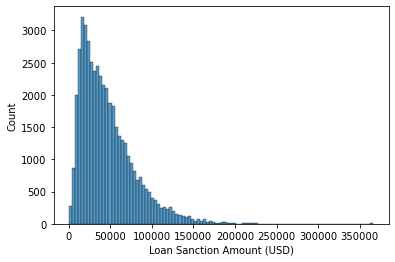

In [6]:
# the graph compared to the amount loan sanction (usd) of the individual
sns.histplot(x="Loan Sanction Amount (USD)", data = data, bins = 100)

### Nhận xét:
- Từ biểu đồ trên ta thấy được con số vay mượn dưới 50000 USD chiếm tỷ lệ lớn, nói cách khác là tỷ lệ mua nhà cao thường diễn ra ở tuổi của các bạn trẻ.
- Càng về già thì nhu cầu của mua nhà của họ cũng giảm đi cho nên số lượng vay mượn càng giảm.
- Mà số tiền vay mượn trên 100000 USD chỉ chiếm một phần nhỏ khoảng dưới 500, trong khi đó số tiền vay mượn dưới 50000 USD lại chiểm gấp 6 lần.

<AxesSubplot:xlabel='Income', ylabel='Count'>

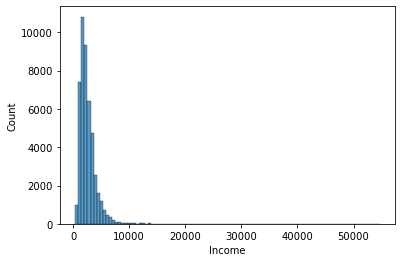

In [7]:
# rename Income(usd) to income in order to draw the bar graph easily
# draw the histplot by seaborn of Income
data.rename(columns = {"Income (USD)":"Income"}, inplace = True)
sns.histplot(x="Income", data = data, bins = 100) # với bins là số cột_chia 100 để đồ thị mịn hơn

### Nhận xét:
- Đa số những người vay mượn để mua nhà đều có mức lương khoảng dưới 10000 USD

In [8]:
data.isnull().sum() # returns the number of missing values in the dataset

Gender                         0
Age                            0
Income                        32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [10]:
data.fillna(1) # fill missing values by 1

,Gender,Age,Income,Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,F,62,2121.48,Low,2135.48,Rural,240291.63,78800.491330
47293,M,38,1506.72,Low,1505.72,Rural,218431.37,72483.293359
47294,F,20,1595.10,Low,1582.10,Semi-Urban,154458.88,52462.861498
47295,F,50,2002.27,Low,2007.27,Semi-Urban,72277.78,22909.596763


In [11]:
print("the amount of data above drops na : ", len(data)) # find the number of data before drop 

the amount of data above drops na :  47297


In [12]:
data = data.dropna() # drop  all Na
print("the amount of data after drops na : ", len(data)) # display the number of data after drop

the amount of data after drops na :  47251


<AxesSubplot:>

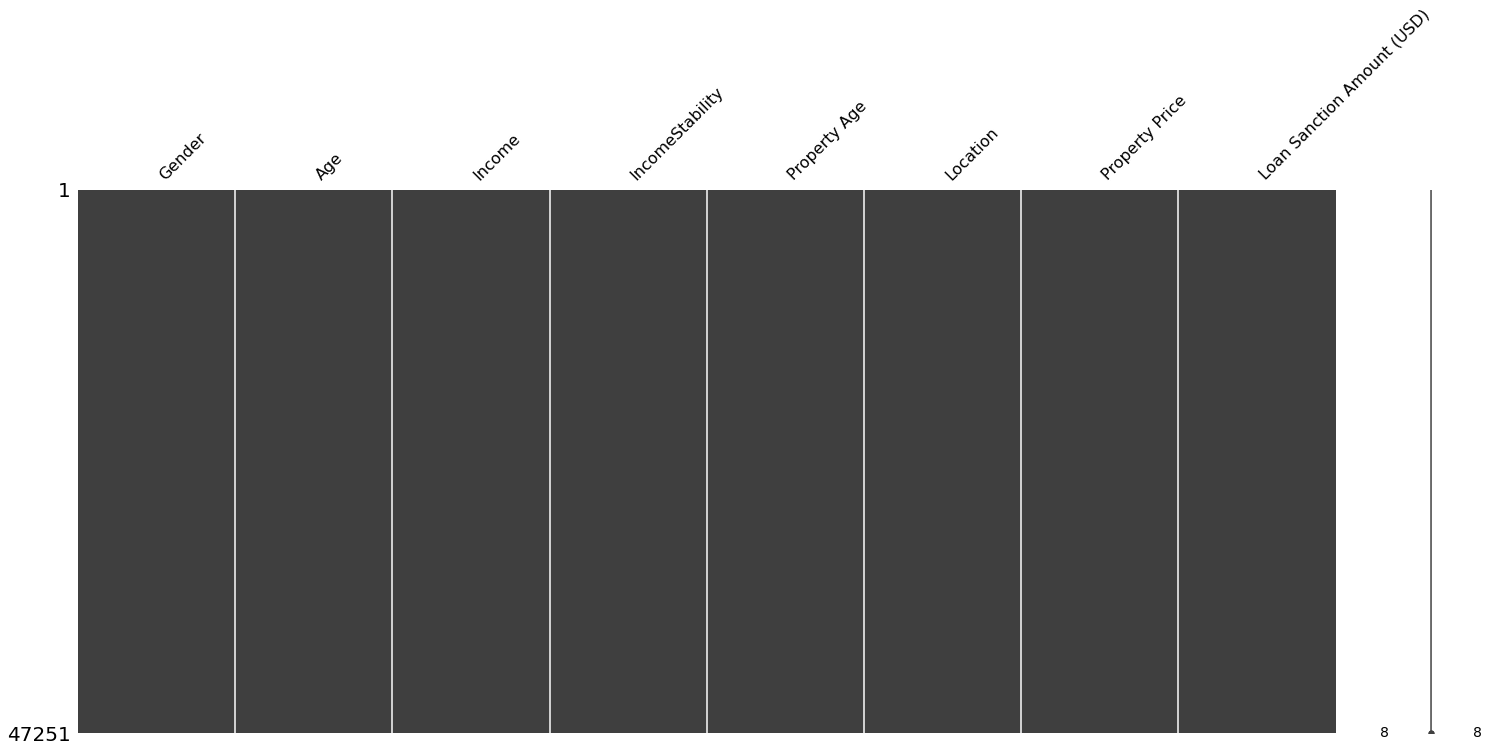

In [65]:
import missingno as msno ### cài đặt hàm cần dùng
msno.matrix(data) ### trực quan hóa dữ liệu

### Nhận xét:
- Dữ liệu ở các cột hiện tại không còn giá trị khuyết

<AxesSubplot:ylabel='Gender'>

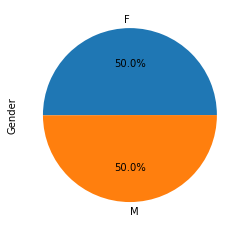

In [13]:
# draw the pie plot compare to 2 genres who loan buy housing
data.Gender.value_counts().plot(kind='pie',autopct="%1.1f%%") 

### Nhận xét:
- Tỷ lệ nam nữ mua nhà bằng nhau, do đó có thể thấy rằng nhu cầu mua nhà là điều cần thiết ở cả nam và nữ.

In [14]:
# staticsfied the values of Income Stability
data['Income Stability'].value_counts()

Low     43045
High     4206
Name: Income Stability, dtype: int64

In [15]:
# rename two column "Property Location" and "Income Stability" to draw the graph easily
data.rename(columns = {"Property Location":"Location"}, inplace = True)
data.rename(columns = {"Income Stability":"IncomeStability"}, inplace = True)

<AxesSubplot:ylabel='IncomeStability'>

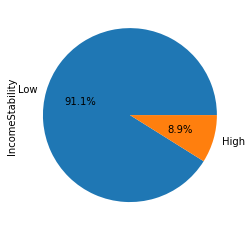

In [16]:
# staticsfied between the high and low of "IncomeStability"
data.IncomeStability.value_counts().plot(kind='pie',autopct="%1.1f%%") 

### Nhận xét:
- Những người vay mượn mua nhà mà có mức lương thấp chiếm tỉ lệ phần trắm cao hơn những người vay mượn mua nhà có mức lương cao.

<AxesSubplot:ylabel='Location'>

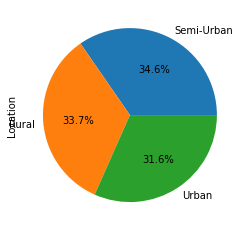

In [17]:
# staticsfied between the high and low of "Location"
data.Location.value_counts().plot(kind='pie',autopct="%1.1f%%") 

### Nhận xét:
- Từ hình thống kê ta thấy được đa số những người vay mượn mua được phân bố tương đối đều ở ba vùng "Urban", "Semi-Urban", "Rural", tuy nhiên trong đó Semi - Urban chiếm tỷ lệ cao nhất.

In [18]:
# Normalized data
norm_data = data.copy()
norm_data["Gender"] = norm_data["Gender"].apply(lambda x:0 if x=='M'else 1)
norm_data["IncomeStability"] = norm_data["IncomeStability"].apply(lambda x: 1 if x=="Low" else 2)
norm_data

,Gender,Age,Income,IncomeStability,Property Age,Location,Property Price,Loan Sanction Amount (USD)
0,1,19,1641.25,1,1651.25,Rural,59641.82,21026.420753
1,0,29,1989.71,1,1990.71,Urban,179858.51,60595.183366
2,1,37,1849.91,1,1856.91,Rural,117297.62,39181.648002
3,0,65,2735.18,2,2747.18,Rural,354417.72,128497.710865
4,1,62,4741.78,2,4740.78,Urban,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,1,62,2121.48,1,2135.48,Rural,240291.63,78800.491330
47293,0,38,1506.72,1,1505.72,Rural,218431.37,72483.293359
47294,1,20,1595.10,1,1582.10,Semi-Urban,154458.88,52462.861498
47295,1,50,2002.27,1,2007.27,Semi-Urban,72277.78,22909.596763


In [19]:
# mapping cathegorial to numerical
location_mapping = {
    'Rural' : 1,
    'Urban' : 2,
    'Semi-Urban' :3}
data['Location'] = data['Location'].map(location_mapping)
data.head()

,Gender,Age,Income,IncomeStability,Property Age,Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,1,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,2,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,1,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,1,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,2,82049.80,39386.919336


### Công thức Correlation coefficient
    r = (nΣXY - ΣXΣY) / sqrt((nΣX^2 - (ΣX)^2)(nΣY^2 - (ΣY)^2))
 - trong đó : r là correlation coefficient giữa hai biến X và Y.
              n là tổng số lượng quan sát.
              ΣXY là tổng của tích giá trị X và Y tương ứng.
              ΣX và ΣY lần lượt là tổng các giá trị của biến X và Y.
              ΣX^2 và ΣY^2 lần lượt là tổng bình phương các giá trị của biến X và Y.

In [20]:
# Correlation
norm_data.corr()

,Gender,Age,Income,IncomeStability,Property Age,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,-0.007706,0.002445,-0.019000,0.002512,-0.005931,-0.003396
Age,-0.007706,1.000000,-0.044086,0.455855,-0.044085,-0.003274,-0.000115
Income,0.002445,-0.044086,1.000000,-0.080961,0.999986,0.358110,0.392897
IncomeStability,-0.019000,0.455855,-0.080961,1.000000,-0.081008,-0.004813,0.070969
Property Age,0.002512,-0.044085,0.999986,-0.081008,1.000000,0.358110,0.392892
Property Price,-0.005931,-0.003274,0.358110,-0.004813,0.358110,1.000000,0.994429
Loan Sanction Amount (USD),-0.003396,-0.000115,0.392897,0.070969,0.392892,0.994429,1.000000


<AxesSubplot:>

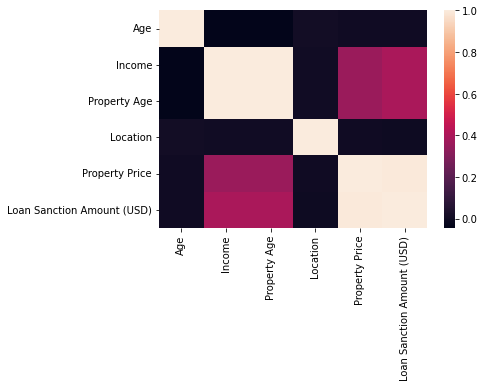

In [21]:
# Draw the heatmap of correlation
sns.heatmap(data.corr())

In [22]:
# Split X, y from dataset
columns = norm_data.columns.tolist()    
columns.remove('Gender')
columns.remove('Location')          
feature_data = norm_data[columns]        
target_data = norm_data.Gender

In [23]:
# Khai báo hàm thư viện
from sklearn.model_selection import train_test_split

In [24]:
# Training X, Y and Test X,Y
X_train, X_test ,Y_train, Y_test = train_test_split(feature_data, target_data, train_size=0.75, random_state=30)

In [25]:
# Display get the current shape of training array
print('Training of X: ',X_train.shape)

Training of X:  (35438, 6)


In [26]:
# display get the current shape of test array
print('Test of X: ',X_test.shape)

Test of X:  (11813, 6)


## Step to linear regression:
1. import the required libraries
4. split the data into training and testing sets
5. create an instance of the linear regression class
6. make predictions using the test data
7. evaluate the performance of the model

In [27]:
# khai báo hàm thư viện để import LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)    

model_lr.fir(X_train, Y_train)

In [28]:
# fit trining X,Y
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
# print coefficient
print(model.coef_ ) 
print()
print(model.intercept_) # print intercept_

[ 2.15199483e-03 -5.87055508e-04 -3.43271165e-01  5.60471068e-04
 -9.22123642e-06  2.72336384e-05]

0.8381415048297605


In [41]:
from sklearn.metrics import mean_absolute_error # Khai báo hàm thư viện

In [45]:
prediction = model.predict(X_test) # dự đoán
mae = mean_absolute_error(y_pred=prediction, y_true=Y_test) # tính mae 
mae

0.49718036564106177

5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)

### The Ridge function
minimize: ||Y - Xβ||^2 + α||β||^2

- Y : là vector của giá trị thực tế
- X: là ma trận của biến dự đoán
- β: hệ số của vector được dự đoán
- α là một siêu tham số bị kiểm soát bởi strength của regularization penalty

### The Lasso function
minimize: ||Y - Xβ||^2 + α||β||

- Y : là vector của giá trị thực tế
- X: là ma trận của biến dự đoán
- β: hệ số của vector được dự đoán
- α là một siêu tham số bị kiểm soát bởi strength của regularization penalty


### The ElasticNet function

minimize: ||Y - Xβ||^2 + αλ||β|| + (1 - α)λ||β||^2

- Y : là vector của giá trị thực tế
- X: là ma trận của biến dự đoán
- β: hệ số của vector được dự đoán
- α là một siêu tham số bị kiểm soát giữa L1 và L2 
- λ : kiểm soát mức độ chuẩn hóa của regularization penalty

In [31]:
# khai báo các hàm thư viện cần dùng
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [32]:
### use Ridge to calculate mse and mae
ridge = Ridge(alpha=1)
ridge.fit(X_train,Y_train)
predictions1 = ridge.predict(X_test)
mse = mean_squared_error(Y_test, predictions1)
print("Mean squared error: ", mse)

Mean squared error:  0.24811740492502773


In [47]:
mae1=mean_absolute_error(y_pred=predictions1, y_true=Y_test)
mae1# calculate mae of ridge

0.49718386534551917

In [72]:
### use Lasso to calculate lasso
lasso = Lasso(alpha=1)
lasso.fit(X_train, Y_train)
predictions2 = lasso.predict(X_test)
mse = mean_squared_error(Y_test, predictions2)
print("Mean squared error: ", mse)

Mean squared error:  0.2498746170162567


In [73]:
mae2=mean_absolute_error(y_pred=predictions2, y_true=Y_test) # calculate mae of lasso
mae2

0.49974400946388503

In [70]:
### use ElasticNet to calculate mse and msa
elasticnet = ElasticNet(alpha = 1,l1_ratio = 0.5)
elasticnet.fit(X_train,Y_train)
predictions3 = elasticnet.predict(X_test)
mse = mean_squared_error(Y_test, predictions3)
print("Mean squared error: ", mse)

Mean squared error:  0.24986867787570413


In [71]:
mae3=mean_absolute_error(y_pred=predictions3, y_true=Y_test)# calculate mae of ElasticNet 
mae3

0.499734491667234

6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


In [51]:
### use PolynomialFeatures to calculate mse and msa
poly = PolynomialFeatures(degree=2, include_bias=False)
poly = LinearRegression()
poly.fit(X_train, Y_train)
predicitions4 = poly.predict(X_test)
mse = mean_squared_error(Y_test, predicitions4)
print("Mean squared error: ", mse)

Mean squared error:  0.2481165893297746


In [52]:
mae4=mean_absolute_error(y_pred=predicitions4, y_true=Y_test) # calculate mae of Polynomial Features order 2
mae4

0.49718036564106177

In [64]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly1 = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())  
poly1.fit(X_train, Y_train)  
pred = poly1.predict(X_test)


In [54]:
Y_pred = pred # gán y_pred là predictions

In [55]:
Y_true = Y_test #gán y_true là test

In [56]:
mean_absolute_error(Y_pred, Y_test) # tính msa  

0.48916081605745776

In [57]:
mse = mean_squared_error(Y_test, pred) # calulate mse
print("Mean squared error: ", mse) # display mse 

Mean squared error:  0.2431807235664149


### Nhận xét :
- Nhìn chung giữa các phương pháp mae của "Ridge", "Lasso" hay "ElasticNet" đều có sự chêch lệch lớn so với kết quả của Linear Regression, tuy nhiên với Ridge thì mae có sự chêch lệch ít hơn so với Linear Regression.
- Nếu chọn n quá cao trong Polynomial Transform sẽ dẫn tới việc chêch lệch cao của mae.Việc Linear Regression với Polinomial Transform với n quá cao sẽ cho kết quả tập test tệ hơn trên tập train